## Attribution

These slides were adapted from [the companion notebooks](https://github.com/REMitchell/python-scraping) for [Web Scraping in Python](http://shop.oreilly.com/product/0636920034391.do), which are open sourced and provided for free.  If you are interested in a more detailed presentation of web scraping in Python, this book is a great source.

In [1]:
!pip install composable
!pip install composablesoup

     |████████████████████████████████| 115 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 1.7 MB/s eta 0:00:01
  Attempting uninstall: toolz
    Found existing installation: toolz 0.10.0
    Uninstalling toolz-0.10.0:
      Successfully uninstalled toolz-0.10.0
  Attempting uninstall: composable
    Found existing installation: composable 0.1.3
    Uninstalling composable-0.1.3:
      Successfully uninstalled composable-0.1.3
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.8.2
    Uninstalling beautifulsoup4-4.8.2:
      Successfully uninstalled beautifulsoup4-4.8.2


In [2]:
!pip install composable --upgrade
!pip install composablesoup --upgrade

Requirement already up-to-date: composable in /home/ki6241pu/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages (0.2.4)
Requirement already up-to-date: composablesoup in /home/ki6241pu/.pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages (0.1.1)


In [3]:
from composablesoup import find, find_all, get_text, has_attr
from composable.sequence import slice, head
from composable.strict import map, filter
from composable.string import replace
from composable import from_toolz as tlz

## CSS and Styling HTML Pages

In this section, we will introduce styling web pages using **Cascading Style Sheets (CSS)**, which is common practice in modern web design.  The consequence of this practice is most, if not all, html tags have attributes that classify and group the tags; often in a meaningful/contextual way.  This attributes are useful when web scraping, as we will see in the following sections

### Exploration

1. Go to [this page](http://www.pythonscraping.com/pages/warandpeace.html)
2. Notice that
    1. All of the quotes are colored <font color="#ff5555">red</font>
    2. All of the character names are colored <font color="#55ff55">green</font>
3. Now right click and view the page source.  Look at the `<style>` tag at the top of the page.  *These entries are CSS selectors, which apply style to all matching tags*.
4. Finally, note that
    1. Each quotation is surrounded by `<span class="red">...</span>`
    2. Each name is surrounded by `<span class="green">...</span>`

### CSS Selectors

* **CSS selector** applies style to call matching tags.
* The following selector is
    * named `green`
    * Applies a <font color="#55ff55">green</font> font

```
.green{
	color:#55ff55;
}
```

### Applying CSS selectors to HTML tags

* Apply a selector with the `class` attribute.
* We can apply the `green` selector using

```
<span class="green">...</span>
```
* Imagine that `class="green"` is the same as 
```
<span color="#55ff55">...</span>
```


### Reading War and Peace

In [37]:
import requests
from bs4 import BeautifulSoup
s = requests.Session()
r = s.get('http://www.pythonscraping.com/pages/warandpeace.html')
war_and_peace = BeautifulSoup(r.content, "html.parser")

In [38]:
war_and_peace

<html>
<head>
<style>
.green{
	color:#55ff55;
}
.red{
	color:#ff5555;
}
#text{
	width:50%;
}
</style>
</head>
<body>
<h1>War and Peace</h1>
<h2>Chapter 1</h2>
<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the firs

## Searching for HTML Attributes

We can search for any HTML tag by attribute using `find` and `find_all`.  This method of searching is particularly advantagous when dealing with pages that styled using CSS selectors, as most/all tags will be marked with a `class` attribute and these attributes many times are related to the context of the content.

In this section, we will illustrate searching with tag attributes using `find` and `find_all`

### A note on `find` and `find_all`

* `soup.find` returns the first matching tag
* `soup.find_all` returns a list of all matching tags

In [39]:
war_and_peace.find('span')

<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>

In [40]:
war_and_peace.find_all('span')[:2]

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
 Buonapartes. But I warn you, if you don't tell me that this means war,
 if you still try to defend the infamies and horrors perpetrated by
 that Antichrist- I really believe he is Antichrist- I will have
 nothing more to do with you and you are no longer my friend, no longer
 my 'faithful slave,' as you call yourself! But how do you do? I see
 I have frightened you- sit down and tell me all the news.</span>,
 <span class="green">Anna
 Pavlovna Scherer</span>]

### pipeable `find` and `find_all`

The module `composablesoup` contains pipeable helper functions for both functions, which we will use exclusively to allow readability and composability.

In [41]:
(war_and_peace 
 >> find('span')
)

<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>

In [42]:
(war_and_peace
 >> find_all('span')
 >> head(2)
)

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
 Buonapartes. But I warn you, if you don't tell me that this means war,
 if you still try to defend the infamies and horrors perpetrated by
 that Antichrist- I really believe he is Antichrist- I will have
 nothing more to do with you and you are no longer my friend, no longer
 my 'faithful slave,' as you call yourself! But how do you do? I see
 I have frightened you- sit down and tell me all the news.</span>,
 <span class="green">Anna
 Pavlovna Scherer</span>]

### Use `find_all` when 

* There might be multiple instances
* (almost always, it's a safer option)

### Use `find` when 

* You know there is exactly one instance
* You know you really only want the first
* (almost never, `find_all` is almost always better)

### Two ways to search tag attributes

* Dictionary: `bs.find_all('span', {'class': 'green'})`
* Keyword: `bs.find_all('span', class_ = green)`

**Note:** We use the keyword `class_` here because `class` is a protected Python keyword that is only used to define classes.  Other attributes, like `src`, do not need the added `_` at the end.

### Getting all names using an attribute dictionary

In [43]:
(war_and_peace
 >> find_all('span', attrs = {'class':'green'})
 >> head(3)
)

[<span class="green">Anna
 Pavlovna Scherer</span>,
 <span class="green">Empress Marya
 Fedorovna</span>,
 <span class="green">Prince Vasili Kuragin</span>]

### Cleaning up the name tags

In [44]:
(war_and_peace
 >> find_all('span', attrs = {'class':'green'})
 >> map(get_text)
 >> head(3)
)

['Anna\nPavlovna Scherer', 'Empress Marya\nFedorovna', 'Prince Vasili Kuragin']

In [45]:
(war_and_peace
 >> find_all('span', attrs = {'class':'green'})
 >> map(get_text)
 >> map(replace('\n', ' '))
 >> head(3)
)

['Anna Pavlovna Scherer', 'Empress Marya Fedorovna', 'Prince Vasili Kuragin']

In [46]:
from composable.string import split
from composable import pipeable
lower = pipeable(lambda s: s.lower())
(war_and_peace
 >> find_all('span', attrs = {'class':'green'})
 >> map(get_text)
 >> map(replace('\n', ' '))
 >> map(split(' '))
 >> map(map(lower))
 >> head(3)
)

[['anna', 'pavlovna', 'scherer'],
 ['empress', 'marya', 'fedorovna'],
 ['prince', 'vasili', 'kuragin']]

### Getting all quotes using the `class_` keyword

In [47]:
(war_and_peace
 >> find_all('span', attrs = {'class':'red'})
 >> head(2)
)

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
 Buonapartes. But I warn you, if you don't tell me that this means war,
 if you still try to defend the infamies and horrors perpetrated by
 that Antichrist- I really believe he is Antichrist- I will have
 nothing more to do with you and you are no longer my friend, no longer
 my 'faithful slave,' as you call yourself! But how do you do? I see
 I have frightened you- sit down and tell me all the news.</span>,
 <span class="red">If you have nothing better to do, Count [or Prince], and if the
 prospect of spending an evening with a poor invalid is not too
 terrible, I shall be very charmed to see you tonight between 7 and 10-
 Annette Scherer.</span>]

<font color="red"><h2>Exercise 1</h2></font>

Write a list comprehension to 

1. Pull each quote out of the `span` tag for each quote.
2. Wrap the quote in `"`

In [109]:
quote = pipeable(lambda s: '"'+s+'"')
(war_and_peace
 >> find_all('span', attrs = {'class':'red'})
 >> map(get_text)
# >> map(split('.",'))
 >> map(replace('\n',' '))
 >> map(quote)
 >> head(2)
)

['"Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if you don\'t tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist- I really believe he is Antichrist- I will have nothing more to do with you and you are no longer my friend, no longer my \'faithful slave,\' as you call yourself! But how do you do? I see I have frightened you- sit down and tell me all the news."',
 '"If you have nothing better to do, Count [or Prince], and if the prospect of spending an evening with a poor invalid is not too terrible, I shall be very charmed to see you tonight between 7 and 10- Annette Scherer."']

In [92]:
(war_and_peace
 >> find_all('span', attrs = {'class':'red'})
 >> map(get_text)
)

["Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don't tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by\nthat Antichrist- I really believe he is Antichrist- I will have\nnothing more to do with you and you are no longer my friend, no longer\nmy 'faithful slave,' as you call yourself! But how do you do? I see\nI have frightened you- sit down and tell me all the news.",
 'If you have nothing better to do, Count [or Prince], and if the\nprospect of spending an evening with a poor invalid is not too\nterrible, I shall be very charmed to see you tonight between 7 and 10-\nAnnette Scherer.',
 'Heavens! what a virulent attack!',
 "First of all, dear friend, tell me how you are. Set your friend's\nmind at rest,",
 'Can one be well while suffering morally? Can one be calm in times\nlike these if one has any feeling?',
 'You are\nstaying the whole evening, I hope?',
 "And the fete at the Eng

In [ ]:
[]

## Getting Data From Tag Attributes

Other, non-CSS attributes have information embedded in thier attributes. For example,

* `src` attribute in `img` tags
* `href` tag in `a` tags.

In this section, we will looks at pulling this information out of a tag.

### Reading the Wikipedia Web Scraping Page

In [53]:
import requests
from bs4 import BeautifulSoup
s = requests.Session() # Start a session
r = s.get('https://en.wikipedia.org/wiki/Web_scraping') # Get a static page
web_scraping = BeautifulSoup(r.content, "html.parser")

### Step 1 - Search For All Tags

In [54]:
(web_scraping
 >> find_all('a')
 >> head(10)
)

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a class="image" href="/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a>,
 <a href="/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a>,
 <a class="external text" href="https://en.wikipedia.org/w/index.php?title=Web_scraping&amp;action=edit">improve this article</a>,
 <a href="/wiki/Help:Referencing_for_beginners" title="Help:Referencing for beginners">adding citations to reliable sources</a>,
 <a class="ex

### Accessing Attribute Data Looks Like Indexing

* **Syntax:** `tag[attribute_string]`
* This returns the corresponding data

In [55]:
example_a_tag1 = (web_scraping
                 >> find_all('a')
                 >> head(3)
                 >> tlz.get(1)
                )
example_a_tag1

<a class="mw-jump-link" href="#mw-head">Jump to navigation</a>

In [56]:
example_a_tag1['href']

'#mw-head'

In [57]:
example_a_tag1 >> tlz.get('href')

'#mw-head'

### Searching for Non-existant Attributes is BAD

* If the attribute doesn't exist, we will get an exception

In [58]:
example_a_tag2 = (web_scraping
                 >> find_all('a')
                 >> head(3)
                 >> tlz.get(0)
                )
example_a_tag2

<a id="top"></a>

In [59]:
example_a_tag2['href']

KeyError: 'href'

### Using a filter to avoid exceptions

* We can use a comprehension to filter out exceptions
* Use the `has_attr` Tag method

In [60]:
(web_scraping
 >> find_all('a')
 >> filter(has_attr('href'))
 >> head(3)
)

[<a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a class="image" href="/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a>]

In [61]:
(web_scraping
 >> find_all('a')
 >> filter(has_attr('href'))
 >> map(tlz.get('href'))
 >> head(10)
)

['#mw-head',
 '#searchInput',
 '/wiki/File:Question_book-new.svg',
 '/wiki/Wikipedia:Verifiability',
 'https://en.wikipedia.org/w/index.php?title=Web_scraping&action=edit',
 '/wiki/Help:Referencing_for_beginners',
 '//www.google.com/search?as_eq=wikipedia&q=%22Web+scraping%22',
 '//www.google.com/search?tbm=nws&q=%22Web+scraping%22+-wikipedia',
 '//www.google.com/search?&q=%22Web+scraping%22+site:news.google.com/newspapers&source=newspapers',
 '//www.google.com/search?tbs=bks:1&q=%22Web+scraping%22+-wikipedia']

<font color="red"><h2>Exercise 2</h2></font>

Write a list comprehension to get the `src` for all `img` tags on the Wikipedia site.

In [65]:
(web_scraping
>> find_all('img')
>> filter(has_attr('src'))
>> map(tlz.get('src'))
>> head(3)
)

['//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Ambox_globe_content.svg/48px-Ambox_globe_content.svg.png']

<font color="red"><h2>Exercise 3</h2></font>

Get all image `src` and link `href` from your Assignment 1 website.

In [72]:
import requests
from bs4 import BeautifulSoup
s = requests.Session() # Start a session
r = s.get('https://katherinehansen.github.io/module_5_website/') # Get a static page
Kate = BeautifulSoup(r.content, "html.parser")

['']
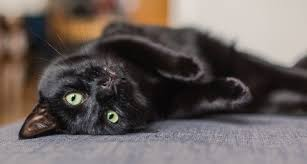

In [90]:
(Kate
>> find_all('img')
>> filter(has_attr('src'))
>> map(tlz.get('src'))
)

In [89]:
(Kate
 >> find_all('a')
 >> filter(has_attr('href'))
 >> map(tlz.get('href'))
)

['https://www.bonappetit.com/recipe/black-beans-and-rice-with-chicken-and-apple-salsa']

## More Complicated Searches

Next, we will

* Search for multiple tags at once
* Search for more than one class

### Searching for a list of tags

Using a list of tags with `find_all` returns all such tags.

In [67]:
(war_and_peace
 >> find_all(['h1', 'h2','h3','h4','h5','h6'])
)

[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]

### Matching more than one attribute

We can match more than one `class` using a set of attribute values

In [68]:
(war_and_peace
 >> find_all('span', attrs = {'class':{'green', 'red'}})
 >> head(3)
)

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
 Buonapartes. But I warn you, if you don't tell me that this means war,
 if you still try to defend the infamies and horrors perpetrated by
 that Antichrist- I really believe he is Antichrist- I will have
 nothing more to do with you and you are no longer my friend, no longer
 my 'faithful slave,' as you call yourself! But how do you do? I see
 I have frightened you- sit down and tell me all the news.</span>,
 <span class="green">Anna
 Pavlovna Scherer</span>,
 <span class="green">Empress Marya
 Fedorovna</span>]

### Searching tag text only

We can search text only using the `text` keyword.

In [69]:
(war_and_peace
 >> find_all(None, text='the prince')
)

['the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince']

### Text search return a NavigableString

* More than text
* Allow access to surrounding tags

In [70]:
(war_and_peace
 >> find_all(None, text='the prince')
 >> map(type)
)

[bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString,
 bs4.element.NavigableString]

### Getting the surrounding tag with `parent`

More information on parent tags is on the way

In [71]:
(war_and_peace
 >> find_all(None, text='the prince')
 >> map(lambda ns: ns.parent)
)

[<span class="green">the prince</span>,
 <span class="green">the prince</span>,
 <span class="green">the prince</span>,
 <span class="green">the prince</span>,
 <span class="green">the prince</span>,
 <span class="green">the prince</span>,
 <span class="green">the prince</span>]